

# Models we Need

## L21
first chart:
k, p, r
100, 0, -
50, 0, -
20, 0, -

pick: k = (fixed k)
second chart:
k, 0.1, 0.5
k, 0.25, .5 ------ same 1
k, 0.4, 0.5

third chart:

k, .25, .1
k, .25, .5 --------- same 1
k, .25, .9

In [137]:
from NMF_Implementation.L21Norm import Algorithm as L21Norm
from NMF_Implementation.L2Norm import Algorithm as L2Norm
from NMF_Implementation.base import load_data
from NMF_Implementation.Noise import salt_and_pepper
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
Xo, Yo = load_data('../data/CroppedYaleB', (30, 37))

/home/alexe/Documents/comp5328-a1/Notebooks/NMF_Implementation/base.py:84: UserWarning: could not handle person ../data/CroppedYaleB/.DS_Store. Skipping...
  warnings.warn(f'could not handle person {person}. Skipping...')


# Image Matrices

In [140]:
# Non Noisy Models
# k=100, no noise
l21_k100_p0 = L21Norm(100, stop_threshold=-np.inf, max_iter=1000)
l21_k100_p0.fit(Xo)
l2_k100_p0 = L2Norm(100, stop_threshold=-np.inf, max_iter=1000)
l2_k100_p0.fit(Xo)
print('ran k=100')

# k=75, no noise
l21_k75_p0 = L21Norm(75, stop_threshold=-np.inf, max_iter=1000)
l21_k75_p0.fit(Xo)
l2_k75_p0 = L2Norm(75, stop_threshold=-np.inf, max_iter=1000)
l2_k75_p0.fit(Xo)
print('ran k=75')

# k=50, no noise
l21_k50_p0 = L21Norm(50, stop_threshold=-np.inf, max_iter=1000)
l21_k50_p0.fit(Xo)
l2_k50_p0 = L2Norm(50, stop_threshold=-np.inf, max_iter=1000)
l2_k50_p0.fit(Xo)
print('ran k=50')

# k=20, no noise
l21_k20_p0 = L21Norm(20, stop_threshold=-np.inf, max_iter=1000)
l21_k20_p0.fit(Xo)
l2_k20_p0 = L2Norm(20, stop_threshold=-np.inf, max_iter=1000)
l2_k20_p0.fit(Xo)
print('ran k=20')

ran k=100
ran k=75
ran k=50
ran k=20


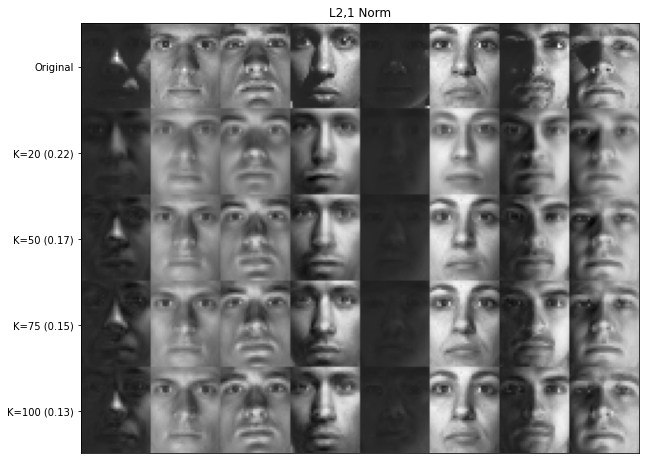

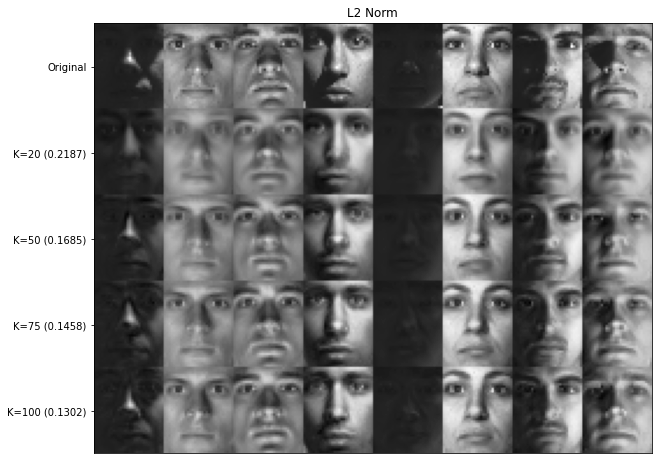

In [141]:
def get_image_row(images):
    return np.concatenate(images, axis=1)
def get_image(*image_rows):
    return np.concatenate(image_rows, axis=0)

def concat_image_ll(image_ll):
    return get_image(*map(get_image_row, image_ll))

n_images = 8
clean = Xo[np.random.choice(Xo.shape[0], n_images, replace=False)]  # images for all visualisations

ik100_l21 = l21_k100_p0.inverse_transform(
            l21_k100_p0.transform(clean))
ik75_l21 = l21_k75_p0.inverse_transform(
           l21_k75_p0.transform(clean))
ik50_l21 = l21_k50_p0.inverse_transform(
           l21_k50_p0.transform(clean))
ik20_l21 = l21_k20_p0.inverse_transform(
           l21_k20_p0.transform(clean))
show_image = concat_image_ll([clean, ik20_l21, ik50_l21, ik75_l21, ik100_l21])
row_labels = ['Original',
              f'K=20 ({ l21_k20_p0.reconstruction_error(Xo, Xo):.2f})',
              f'K=50 ({ l21_k50_p0.reconstruction_error(Xo, Xo):.2f})',
              f'K=75 ({ l21_k75_p0.reconstruction_error(Xo, Xo):.2f})',
              f'K=100 ({l21_k100_p0.reconstruction_error(Xo, Xo):.2f})']
plt.figure(figsize=(10, 10))
plt.title('L2,1 Norm')
plt.imshow(show_image, cmap='Greys_r')
plt.xticks([])#np.linspace(0, show_image.shape[1] - Xo.shape[2], n_images) + Xo.shape[2] / 2, range(n_images))
plt.yticks(np.linspace(0, show_image.shape[0] - Xo.shape[1], len(row_labels)) + Xo.shape[1] / 2, row_labels)
plt.savefig('./figures/change_k_matrix_noiseless_l21_YALE.png')
plt.show()

ik100_l2 = l2_k100_p0.inverse_transform(
           l2_k100_p0.transform(clean))
ik75_l2 = l2_k75_p0.inverse_transform(
          l2_k75_p0.transform(clean))
ik50_l2 = l2_k50_p0.inverse_transform(
          l2_k50_p0.transform(clean))
ik20_l2 = l2_k20_p0.inverse_transform(
          l2_k20_p0.transform(clean))
show_image = concat_image_ll([clean, ik20_l2, ik50_l2, ik75_l2, ik100_l2])
row_labels = ['Original',
              f'K=20 ({ l2_k20_p0.reconstruction_error(Xo, Xo):.4f})',
              f'K=50 ({ l2_k50_p0.reconstruction_error(Xo, Xo):.4f})',
              f'K=75 ({ l2_k75_p0.reconstruction_error(Xo, Xo):.4f})',
              f'K=100 ({l2_k100_p0.reconstruction_error(Xo, Xo):.4f})']
plt.figure(figsize=(10, 10))
plt.imshow(show_image, cmap='Greys_r')
plt.title('L2 Norm')
plt.xticks([])#np.linspace(0, show_image.shape[1] - Xo.shape[2], n_images) + Xo.shape[2] / 2, range(n_images))
plt.yticks(np.linspace(0, show_image.shape[0] - Xo.shape[1], len(row_labels)) + Xo.shape[1] / 2, row_labels)
plt.savefig('./figures/change_k_matrix_noiseless_l2_YALE.png')
plt.show()

In [142]:
# Noisy Models
k = 75
assert k, 'Pick k!'

# vary P
# p=.1, r=.5
l21_kf_p10_r50 = L21Norm(k, stop_threshold=-np.inf, max_iter=1000)
l21_kf_p10_r50.fit(salt_and_pepper(Xo, .1, .5))
l2_kf_p10_r50 = L2Norm(k, stop_threshold=-np.inf, max_iter=1000)
l2_kf_p10_r50.fit(salt_and_pepper(Xo, .1, .5))
print('ran vary P=.1')

# p=.25, r=.5
l21_kf_p25_r50 = L21Norm(k, stop_threshold=-np.inf, max_iter=1000)
l21_kf_p25_r50.fit(salt_and_pepper(Xo, .25, .5))
l2_kf_p25_r50 = L2Norm(k, stop_threshold=-np.inf, max_iter=1000)
l2_kf_p25_r50.fit(salt_and_pepper(Xo, .25, .5))
print('ran vary P=.25')

# p=.4, r=.5
l21_kf_p40_r50 = L21Norm(k, stop_threshold=-np.inf, max_iter=1000)
l21_kf_p40_r50.fit(salt_and_pepper(Xo, .4, .5))
l2_kf_p40_r50 = L2Norm(k, stop_threshold=-np.inf, max_iter=1000)
l2_kf_p40_r50.fit(salt_and_pepper(Xo, .4, .5))
print('ran vary P=.4')

# vary R
# p=.25, r=.1
l21_kf_p25_r10 = L21Norm(k, stop_threshold=-np.inf, max_iter=1000)
l21_kf_p25_r10.fit(salt_and_pepper(Xo, .25, .1))
l2_kf_p25_r10 = L2Norm(k, stop_threshold=-np.inf, max_iter=1000)
l2_kf_p25_r10.fit(salt_and_pepper(Xo, .25, .1))
print('ran p=.25 r=.1')

# p=.25, r=.5 (already ran)
#l21_kf_p25_r50 = L21Norm(k, stop_threshold=-np.inf, max_iter=1000)
#l21_kf_p25_r50.fit(salt_and_pepper(Xo, .25, .5))
#l2_kf_p25_r50 = L2Norm(k, stop_threshold=-np.inf, max_iter=1000)
#l2_kf_p25_r50.fit(salt_and_pepper(Xo, .25, .5))
print('ran p=.25 r=.5')

# p=.25, r=.9
l21_kf_p25_r90 = L21Norm(k, stop_threshold=-np.inf, max_iter=1000)
l21_kf_p25_r90.fit(salt_and_pepper(Xo, .25, .9))
l2_kf_p25_r90 = L2Norm(k, stop_threshold=-np.inf, max_iter=1000)
l2_kf_p25_r90.fit(salt_and_pepper(Xo, .25, .9))
print('ran p=.25 r=.9')

ran vary P=.1
ran vary P=.25
ran vary P=.4
ran p=.25 r=.1
ran p=.25 r=.5
ran p=.25 r=.9


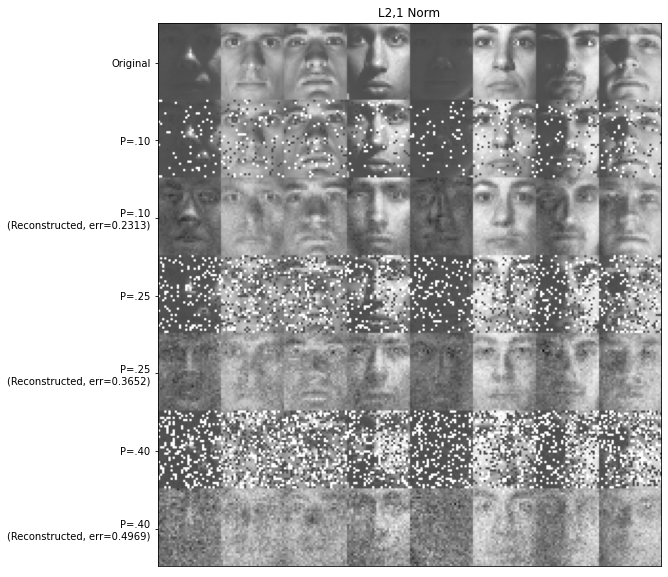

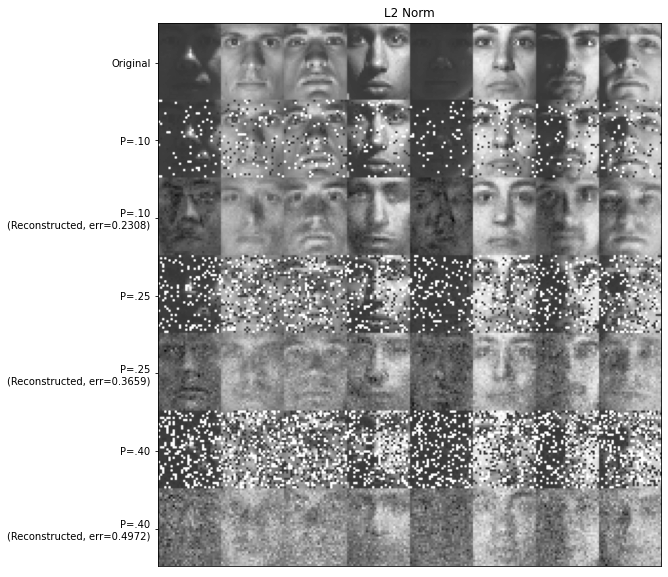

In [143]:
# generate noisy images
in_p10_r50 = salt_and_pepper(clean, .1, .5)
in_p25_r50 = salt_and_pepper(clean, .25, .5)
in_p40_r50 = salt_and_pepper(clean, .4, .5)

# L21


itit_p10_r50l21 = l21_kf_p10_r50.inverse_transform(
                  l21_kf_p10_r50.transform(
                      in_p10_r50))
itit_p25_r50l21 = l21_kf_p25_r50.inverse_transform(
                  l21_kf_p25_r50.transform(
                      in_p25_r50))
itit_p40_r50l21 = l21_kf_p40_r50.inverse_transform(
                  l21_kf_p40_r50.transform(
                      in_p40_r50))
show_image = concat_image_ll([clean, in_p10_r50, itit_p10_r50l21, in_p25_r50, itit_p25_r50l21, in_p40_r50, itit_p40_r50l21])
row_labels = [
    'Original',
    f'P=.10',
    f'P=.10\n(Reconstructed, err={l21_kf_p10_r50.reconstruction_error(salt_and_pepper(Xo, .1 , .5), Xo):.4f})',
    f'P=.25',
    f'P=.25\n(Reconstructed, err={l21_kf_p25_r50.reconstruction_error(salt_and_pepper(Xo, .25, .5), Xo):.4f})',
    f'P=.40',
    f'P=.40\n(Reconstructed, err={l21_kf_p40_r50.reconstruction_error(salt_and_pepper(Xo, .4 , .5), Xo):.4f})'
]
plt.figure(figsize=(10, 10))
plt.title('L2,1 Norm')
plt.imshow(show_image, cmap='Greys_r')
plt.xticks([])#np.linspace(0, show_image.shape[1] - Xo.shape[2], n_images) + Xo.shape[2] / 2, range(n_images))
plt.yticks(np.linspace(0, show_image.shape[0] - Xo.shape[1], len(row_labels)) + Xo.shape[1] / 2, row_labels)
plt.savefig('./figures/change_p_matrix_l21_YALE.png')
plt.show()

# l2
itit_p10_r50l2 = l2_kf_p10_r50.inverse_transform(
                  l2_kf_p10_r50.transform(
                      in_p10_r50))
itit_p25_r50l2 = l2_kf_p25_r50.inverse_transform(
                  l2_kf_p25_r50.transform(
                      in_p25_r50))
itit_p40_r50l2 = l2_kf_p40_r50.inverse_transform(
                  l2_kf_p40_r50.transform(
                      in_p40_r50))
show_image = concat_image_ll([clean, in_p10_r50, itit_p10_r50l2, in_p25_r50, itit_p25_r50l2, in_p40_r50, itit_p40_r50l2])
row_labels = [
    'Original',
    f'P=.10',
    f'P=.10\n(Reconstructed, err={l2_kf_p10_r50.reconstruction_error(salt_and_pepper(Xo, .1 , .5), Xo):.4f})',
    f'P=.25',
    f'P=.25\n(Reconstructed, err={l2_kf_p25_r50.reconstruction_error(salt_and_pepper(Xo, .25, .5), Xo):.4f})',
    f'P=.40',
    f'P=.40\n(Reconstructed, err={l2_kf_p40_r50.reconstruction_error(salt_and_pepper(Xo, .4 , .5), Xo):.4f})'
]
plt.figure(figsize=(10, 10))
plt.title('L2 Norm')
plt.imshow(show_image, cmap='Greys_r')
plt.xticks([])#np.linspace(0, show_image.shape[1] - Xo.shape[2], n_images) + Xo.shape[2] / 2, range(n_images))
plt.yticks(np.linspace(0, show_image.shape[0] - Xo.shape[1], len(row_labels)) + Xo.shape[1] / 2, row_labels)
plt.savefig('./figures/change_p_matrix_l2_YALE.png')
plt.show()

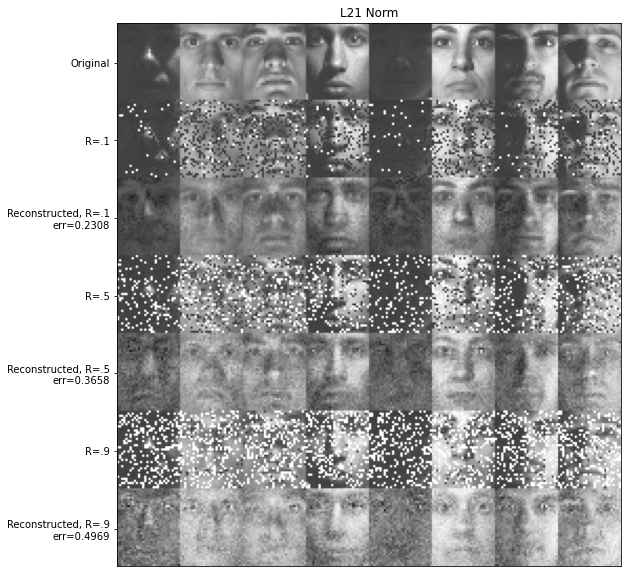

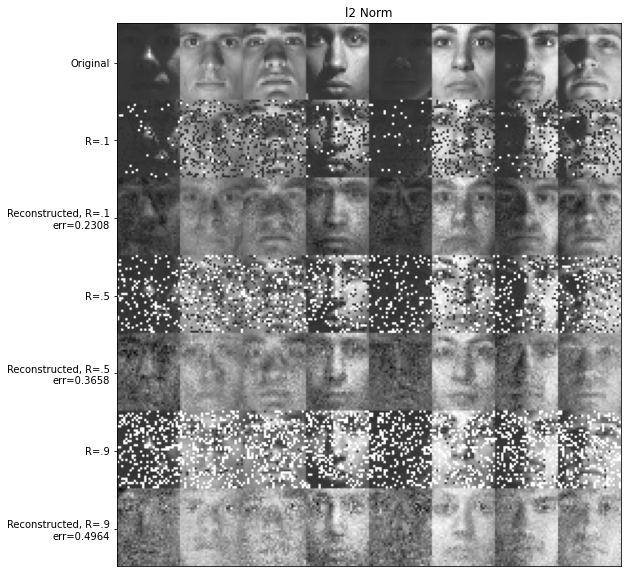

In [144]:
# generate noisy data
clean
in_p25_r10 = salt_and_pepper(clean, .25, .1)
in_p25_r50 = salt_and_pepper(clean, .25, .5)
in_p25_r90 = salt_and_pepper(clean, .25, .9)

itit_p25_r10l21 = l21_kf_p25_r10.inverse_transform(
                  l21_kf_p25_r10.transform(
                      in_p25_r10))
itit_p25_r50l21 = l21_kf_p25_r50.inverse_transform(
                  l21_kf_p25_r50.transform(
                      in_p25_r50))
itit_p25_r90l21 = l21_kf_p25_r90.inverse_transform(
                  l21_kf_p25_r90.transform(
                      in_p25_r90))
show_image = concat_image_ll([clean,
                              in_p25_r10, itit_p25_r10l21,
                              in_p25_r50, itit_p25_r50l21,
                              in_p25_r90, itit_p25_r90l21])
row_labels = [
    'Original',
    f'R=.1',
    f'Reconstructed, R=.1\nerr={l2_kf_p10_r50.reconstruction_error(salt_and_pepper(Xo, .1 , .5), Xo):.4f}',
    f'R=.5',
    f'Reconstructed, R=.5\nerr={l2_kf_p25_r50.reconstruction_error(salt_and_pepper(Xo, .25, .5), Xo):.4f}',
    f'R=.9',
    f'Reconstructed, R=.9\nerr={l2_kf_p40_r50.reconstruction_error(salt_and_pepper(Xo, .4 , .5), Xo):.4f}'
]
plt.figure(figsize=(10, 10))
plt.title('L21 Norm')
plt.imshow(show_image, cmap='Greys_r')
plt.xticks([])#np.linspace(0, show_image.shape[1] - Xo.shape[2], n_images) + Xo.shape[2] / 2, range(n_images))
plt.yticks(np.linspace(0, show_image.shape[0] - Xo.shape[1], len(row_labels)) + Xo.shape[1] / 2, row_labels)
plt.savefig('./figures/change_r_matrix_l21_YALE.png')
plt.show()


itit_p25_r10l2 = l2_kf_p25_r10.inverse_transform(
                  l2_kf_p25_r10.transform(
                      in_p25_r10))
itit_p25_r50l2 = l2_kf_p25_r50.inverse_transform(
                  l2_kf_p25_r50.transform(
                      in_p25_r50))
itit_p25_r90l2 = l2_kf_p25_r90.inverse_transform(
                  l2_kf_p25_r90.transform(
                      in_p25_r90))
show_image = concat_image_ll([clean,
                              in_p25_r10, itit_p25_r10l2,
                              in_p25_r50, itit_p25_r50l2,
                              in_p25_r90, itit_p25_r90l2])
row_labels = [
    'Original',
    f'R=.1',
    f'Reconstructed, R=.1\nerr={l2_kf_p10_r50.reconstruction_error(salt_and_pepper(Xo, .1 , .5), Xo):.4f}',
    f'R=.5',
    f'Reconstructed, R=.5\nerr={l2_kf_p25_r50.reconstruction_error(salt_and_pepper(Xo, .25, .5), Xo):.4f}',
    f'R=.9',
    f'Reconstructed, R=.9\nerr={l2_kf_p40_r50.reconstruction_error(salt_and_pepper(Xo, .4 , .5), Xo):.4f}'
]
plt.figure(figsize=(10, 10))
plt.title('l2 Norm')
plt.imshow(show_image, cmap='Greys_r')
plt.xticks([])#np.linspace(0, show_image.shape[1] - Xo.shape[2], n_images) + Xo.shape[2] / 2, range(n_images))
plt.yticks(np.linspace(0, show_image.shape[0] - Xo.shape[1], len(row_labels)) + Xo.shape[1] / 2, row_labels)
plt.savefig('./figures/change_r_matrix_l2_YALE.png')
plt.show()

# Components exploration

In [ ]:
rep = l2_kf_p10_r50.transform(salt_and_pepper(clean, .1, .5)).reshape(8, 15, 5)
rep = np.concatenate((np.clip(rep,0,np.inf), np.ones((8, 15, 1))*np.max(rep)), axis=2)
plt.imshow(get_image_row(rep), cmap='Greys_r')
plt.title('Representation Vectors Example L2 Norm')
#plt.savefig('./figures/Representation_Vectors_L2.png')
plt.show()

rep = l2_kf_p10_r50.transform(salt_and_pepper(clean, .1, .5)).reshape(8, 15, 5)
rep = np.concatenate((np.clip(rep,0,np.inf), np.ones((8, 15, 1))*np.max(rep)), axis=2)
plt.imshow(get_image_row(rep), cmap='Greys_r')
plt.title('Representation Vectors Example L2,1 Norm')
#plt.savefig('./figures/Ropresentation_Vectors_L21.png')

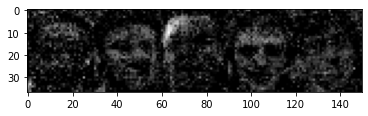

In [133]:
comps = l2_kf_p10_r50.inverse_transform(np.eye(75))
plt.imshow(get_image_row(comps[5:10]), cmap='Greys_r')

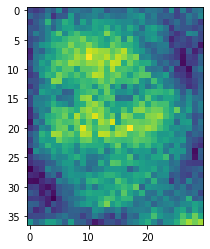

In [126]:
plt.imshow(l21_kf_p10_r50.inverse_transform(np.clip(
    l21_kf_p10_r50.transform(salt_and_pepper(clean, .1, .5)),
    0, np.inf
))[0])

# Reconstruction error vs components

In [136]:
from notebook_tools import reconstruction_error_sample
data = []
for components in [1, 10, 20, 50, 75, 100]:
    res = reconstruction_error_sample(Xo, lambda: L2Norm(components, stop_threshold=-np.inf, max_iter=1000), lambda x: x)
    for r in res:
        r['components'] = components
        r['model'] = 'L2'
    res2 = reconstruction_error_sample(Xo, lambda: L21Norm(components, stop_threshold=-np.inf, max_iter=1000), lambda x: x)
    for r in res2:
        r['components'] = components
        r['model'] = 'L21'
    data.extend(res)
    data.extend(res2)
    print(f'Done {components}')
    print(data)

Done 1
[{'reconstruction_error': 0.29299708984369083, 'run': 0, 'iterations': 1001, 'components': 1, 'model': 'L2'}, {'reconstruction_error': 0.29185329121468645, 'run': 1, 'iterations': 1001, 'components': 1, 'model': 'L2'}, {'reconstruction_error': 0.29225668497901863, 'run': 2, 'iterations': 1001, 'components': 1, 'model': 'L2'}, {'reconstruction_error': 0.29271605909052817, 'run': 3, 'iterations': 1001, 'components': 1, 'model': 'L2'}, {'reconstruction_error': 0.2919563989813973, 'run': 4, 'iterations': 1001, 'components': 1, 'model': 'L2'}, {'reconstruction_error': 0.29314128037380327, 'run': 0, 'iterations': 1001, 'components': 1, 'model': 'L21'}, {'reconstruction_error': 0.2933235148734294, 'run': 1, 'iterations': 1001, 'components': 1, 'model': 'L21'}, {'reconstruction_error': 0.29193899977413773, 'run': 2, 'iterations': 1001, 'components': 1, 'model': 'L21'}, {'reconstruction_error': 0.29435739547699147, 'run': 3, 'iterations': 1001, 'components': 1, 'model': 'L21'}, {'reconst

Done 75
[{'reconstruction_error': 0.29299708984369083, 'run': 0, 'iterations': 1001, 'components': 1, 'model': 'L2'}, {'reconstruction_error': 0.29185329121468645, 'run': 1, 'iterations': 1001, 'components': 1, 'model': 'L2'}, {'reconstruction_error': 0.29225668497901863, 'run': 2, 'iterations': 1001, 'components': 1, 'model': 'L2'}, {'reconstruction_error': 0.29271605909052817, 'run': 3, 'iterations': 1001, 'components': 1, 'model': 'L2'}, {'reconstruction_error': 0.2919563989813973, 'run': 4, 'iterations': 1001, 'components': 1, 'model': 'L2'}, {'reconstruction_error': 0.29314128037380327, 'run': 0, 'iterations': 1001, 'components': 1, 'model': 'L21'}, {'reconstruction_error': 0.2933235148734294, 'run': 1, 'iterations': 1001, 'components': 1, 'model': 'L21'}, {'reconstruction_error': 0.29193899977413773, 'run': 2, 'iterations': 1001, 'components': 1, 'model': 'L21'}, {'reconstruction_error': 0.29435739547699147, 'run': 3, 'iterations': 1001, 'components': 1, 'model': 'L21'}, {'recons

In [139]:
pd.DataFrame(data).to_csv('components_vs_reconstruction_error_n5.csv')